In [0]:
import numpy as np
import pandas as pd

import tensorflow as tf

from skimage.io import imread, imshow

In [0]:
tf.VERSION

'1.12.0'

In [0]:
tf.test.is_gpu_available()

False

In [0]:
np.random.seed(42)
tf.random.set_random_seed(42)

In [0]:
# to open shortcut cheatsheet use ctrl + m + h

Download dataset

In [0]:
#!wget #insert private link here

In [0]:
#%%capture
#!unzip MURA-v1.1.zip

In [0]:
train_img_fnames = pd.read_csv('MURA-v1.1/train_image_paths.csv', header=None)[0]
train_img_fnames.sample(5)

263      MURA-v1.1/train/XR_SHOULDER/patient00082/study...
14766    MURA-v1.1/train/XR_ELBOW/patient04908/study1_p...
5100     MURA-v1.1/train/XR_SHOULDER/patient01659/study...
36540    MURA-v1.1/train/XR_HAND/patient02521/study1_ne...
24129    MURA-v1.1/train/XR_WRIST/patient07478/study1_n...
Name: 0, dtype: object

In [0]:
train_img_fnames[0]

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png'

The path contains either positive or negative, representing the groundtruth label of the study

In [0]:
train_labels = train_img_fnames.apply(lambda path: 1 if 'positive' in path else 0) # encode negative as 0, positive as 1
train_labels.sample(5)

31108    0
33741    0
12734    0
14927    1
4643     0
Name: 0, dtype: int64

In [0]:
test_img = imread(train_img_fnames[0])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


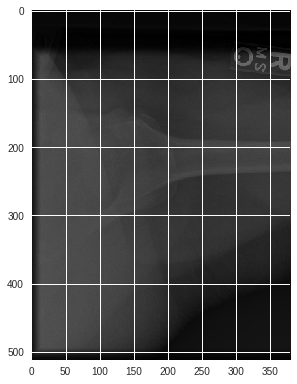

In [0]:
imshow(test_img)

In [0]:
batch_size = 16

In [0]:
def load_img(filename, label):
  img_str = tf.read_file(filename)
  img = tf.image.decode_png(img_str, channels=1)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize_images(img, [224, 224])
  return img, label
  

In [0]:
train_data = tf.data.Dataset.from_tensor_slices((train_img_fnames, train_labels))
train_data = train_data.shuffle(len(train_img_fnames))
train_data = train_data.map(load_img, num_parallel_calls=4)
#train_data = train_data.map(preprocess_img, num_parallel_calls=4) # TODO write preprocess function
train_data = train_data.batch(batch_size)
train_data = train_data.prefetch(1)